<a href="https://colab.research.google.com/github/Qozuu/ocr-cctv-timestamp/blob/master/detect_plat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies untuk YOLOv8
!pip install ultralytics opencv-python

In [2]:
# Install dependencies untuk EasyOCR
!pip install easyocr opencv-python

In [3]:
# Install OpenALPR (biasanya lebih rumit dan memerlukan konfigurasi tambahan)
!pip install openalpr

In [10]:
!apt-get install -y libopenalpr-dev
!pip install openalpr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libopenalpr-dev


In [4]:
from google.colab import files
uploaded = files.upload()

Saving sample1.jpg to sample1.jpg



image 1/1 /content/sample1.jpg: 448x640 7 persons, 6 cars, 3 motorcycles, 38.0ms
Speed: 3.1ms preprocess, 38.0ms inference, 134.6ms postprocess per image at shape (1, 3, 448, 640)


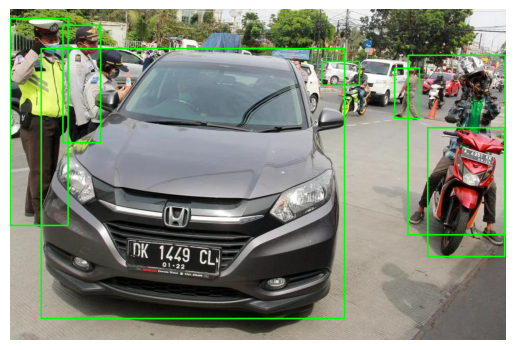

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load model YOLOv8 (pre-trained model)
model = YOLO('yolov8n.pt')  # Ganti dengan model yang dilatih atau model pre-trained

# Upload gambar
image_path = 'sample1.jpg'  # Ganti dengan gambar yang telah di-upload

# Lakukan deteksi dengan model YOLO
results = model(image_path)  # Menggunakan path gambar untuk deteksi

# Akses hasil deteksi dari objek `results`
boxes = results[0].boxes  # Mengambil hasil bounding box

# Membaca gambar untuk menggambar bounding box
img = cv2.imread(image_path)

# Menyaring dan menggambar bounding box untuk plat
for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]  # Koordinat bounding box (x1, y1, x2, y2)
    conf = box.conf[0]  # Kepercayaan deteksi
    if conf > 0.5:  # Threshold untuk kepercayaan
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Menampilkan gambar dengan bounding box menggunakan Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

Detected Plate: TK 1479 CL
Detected Plate: 01*22


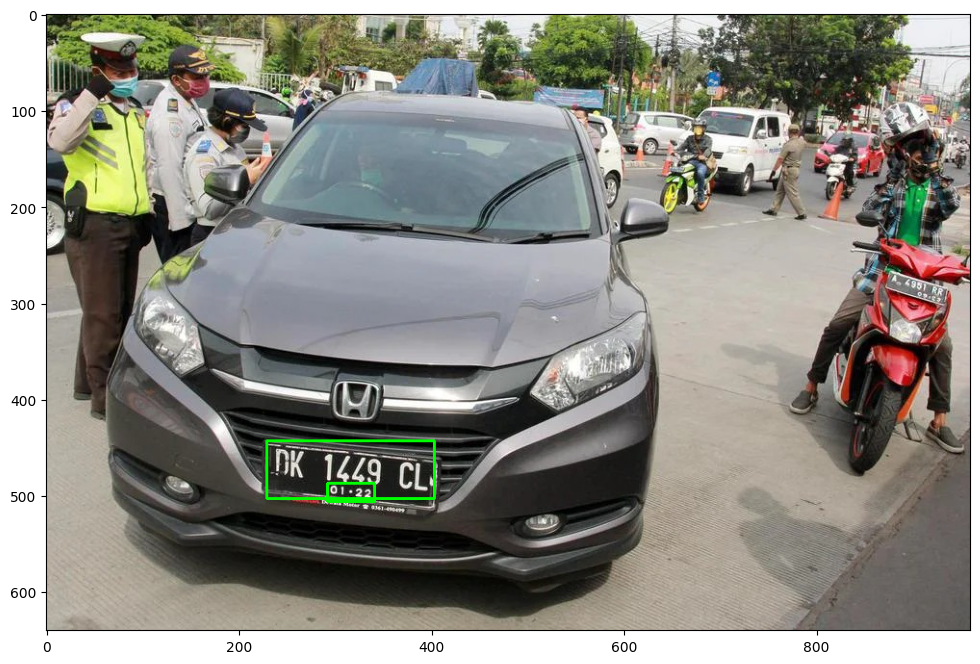

In [7]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi EasyOCR Reader untuk deteksi plat nomor
reader = easyocr.Reader(['id'])

# Upload gambar
image_path = 'sample1.jpg'  # Ganti dengan gambar yang telah di-upload
img = cv2.imread(image_path)

# Lakukan OCR untuk membaca plat
result = reader.readtext(image_path)

# Menampilkan hasil deteksi
for detection in result:
    text = detection[1]
    print("Detected Plate:", text)
    # Gambar bounding box sekitar plat nomor
    box = detection[0]
    cv2.polylines(img, [np.array(box, dtype=np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

# Menampilkan gambar dengan bounding box
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
from openalpr import Alpr
import cv2
import matplotlib.pyplot as plt

# Inisialisasi OpenALPR untuk plat Indonesia (gunakan 'id' untuk negara Indonesia)
alpr = Alpr('id', '/usr/local/lib/python3.11/dist-packages/openalpr/config', '/usr/local/lib/python3.11/dist-packages/openalpr/runtime_data')

if not alpr.is_loaded():
    print("Error loading OpenALPR")
else:
    print("OpenALPR loaded successfully")

# Gambar yang akan diproses
image_path = 'sample1.jpg'  # Ganti dengan path gambar yang baru

# Membaca gambar
img = cv2.imread(image_path)

# Deteksi plat menggunakan OpenALPR
results = alpr.recognize_array(img)

# Menampilkan hasil deteksi plat
print("Detected Plates:")
for plate in results['results']:
    print(f"Plat: {plate['plate']} - Confidence: {plate['confidence']}")

# Menampilkan gambar dengan hasil deteksi
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

OSError: Unable to locate the OpenALPR library. Please make sure that OpenALPR is properly installed on your system and that the libraries are in the appropriate paths.

In [15]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [12]:
# Add the OpenALPR PPA and update package lists
!sudo add-apt-repository -y ppa:openalpr/ppa
!sudo apt-get update

# Install libopenalpr-dev
!sudo apt-get install -y libopenalpr-dev

ERROR: ppa 'openalpr/ppa' not found (use --login if private)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,923 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubu

In [13]:
from openalpr import Alpr
import cv2
import matplotlib.pyplot as plt

# Inisialisasi OpenALPR untuk plat Indonesia (gunakan 'id' untuk negara Indonesia)
alpr = Alpr('id', '/usr/local/lib/python3.11/dist-packages/openalpr/config', '/usr/local/lib/python3.11/dist-packages/openalpr/runtime_data')

if not alpr.is_loaded():
    print("Error loading OpenALPR")
else:
    print("OpenALPR loaded successfully")

# Gambar yang akan diproses
image_path = 'sample1.jpg'  # Ganti dengan path gambar yang baru

# Membaca gambar
img = cv2.imread(image_path)

# Deteksi plat menggunakan OpenALPR
results = alpr.recognize_array(img)

# Menampilkan hasil deteksi plat
print("Detected Plates:")
for plate in results['results']:
    print(f"Plat: {plate['plate']} - Confidence: {plate['confidence']}")

# Menampilkan gambar dengan hasil deteksi
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

OSError: Unable to locate the OpenALPR library. Please make sure that OpenALPR is properly installed on your system and that the libraries are in the appropriate paths.